<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/LatentAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


In [0]:
airQualityFilePath = base_dir + '/AQ_Boston_Cam-Quincy_2017_Jan_to_Dec_New.csv'
chronicDiseaseFilePath = base_dir + '/U.S_Chronic_Disease_Indicators_CDI.csv'

In [0]:
import pandas as pd
import numpy as np

Loading the datasets

In [0]:
df_air_quality = pd.read_csv(airQualityFilePath, engine='python')
df_chronic_disease = pd.read_csv(chronicDiseaseFilePath)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Drop unwanted columns

In [0]:
df_air_quality.drop(df_air_quality.columns[[6, 7 ,10, 11, 12]], axis=1, inplace=True)

Assigning column names

In [0]:
df_air_quality.columns = ['timestamp', 'parameter', 'location', 'value','unit','city', 'latitudelongitude', 'country']

In [0]:
df_air_quality.head(5)

,timestamp,parameter,location,value,unit,city,latitudelongitude,country
0,2017-01-01T00:00:00.000Z2016-12-31T19:00:00-0...,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,43.075367-70.74802,US
1,2017-01-01T01:00:00.000Z2016-12-31T20:00:00-0...,o3,Portsmouth,0.031,ppm,Boston-Cambridge-Quincy,43.075367-70.74802,US
2,2017-01-01T01:00:00.000Z2016-12-31T20:00:00-0...,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,43.075367-70.74802,US
3,2017-01-01T02:00:00.000Z2016-12-31T21:00:00-0...,o3,Portsmouth,0.033,ppm,Boston-Cambridge-Quincy,43.075367-70.74802,US
4,2017-01-01T02:00:00.000Z2016-12-31T21:00:00-0...,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,43.075367-70.74802,US


Removing Hex values

In [0]:
df_air_quality['latitudelongitude'] = df_air_quality['latitudelongitude'].replace({'\x02':' '}, regex=True)

Splitting Latitude Longitude values

In [0]:
df_air_quality[['latitude', 'longitude']] = df_air_quality['latitudelongitude'].str.split(n=1, expand=True)

In [0]:
df_air_quality['timestamp'][0]

'2017-01-01T00:00:00.000Z\x022016-12-31T19:00:00-05:00'

Removing Hex values from timestamp

In [0]:
df_air_quality['timestamp'] = df_air_quality['timestamp'].replace({'\x02':' '}, regex=True)
df_air_quality[['utc', 'local']] = df_air_quality['timestamp'].str.split(n=1, expand=True)

In [0]:
df_air_quality['timestamp'][0]

'2017-01-01T00:00:00.000Z 2016-12-31T19:00:00-05:00'

Removing unwanted columns

In [0]:
df_air_quality.drop(df_air_quality.columns[[0, 6]], axis=1, inplace=True)

In [0]:
df_air_quality.head(5)

,parameter,location,value,unit,city,country,latitude,longitude,utc,local
0,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T00:00:00.000Z,2016-12-31T19:00:00-05:00
1,o3,Portsmouth,0.031,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00
2,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00
3,o3,Portsmouth,0.033,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00
4,so2,Portsmouth,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00


Removing NaN rows and Getting unique locations

In [0]:
df_air_quality.dropna(inplace=True)
df_air_quality.location.unique()

array(['Portsmouth', 'Boston - Roxbury', 'BOSTON-KENMORE', 'LYNN',
       'Haverhill', 'USEPA Region 1 Lab', 'E. Milton - Blue Hil',
       'Boston - North End', 'Odiorne State Park'], dtype=object)

Converting Location to categorical value

In [0]:
c = df_air_quality['location'].astype('category')
d = dict(enumerate(c.cat.categories))
df_air_quality['location'] = c.cat.codes

In [0]:
df_air_quality.head(5)

,parameter,location,value,unit,city,country,latitude,longitude,utc,local
0,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T00:00:00.000Z,2016-12-31T19:00:00-05:00
1,o3,7,0.031,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00
2,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00
3,o3,7,0.033,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00
4,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00


Convert timestamp to date

In [0]:
df_air_quality['date'] = pd.to_datetime(df_air_quality['local'], errors='coerce')
df_air_quality['date']  = df_air_quality['date'].dt.date

In [0]:
df_air_quality.head(5)

,parameter,location,value,unit,city,country,latitude,longitude,utc,local,date
0,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T00:00:00.000Z,2016-12-31T19:00:00-05:00,2016-12-31
1,o3,7,0.031,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00,2016-12-31
2,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T01:00:00.000Z,2016-12-31T20:00:00-05:00,2016-12-31
3,o3,7,0.033,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00,2016-12-31
4,so2,7,0.002,ppm,Boston-Cambridge-Quincy,US,43.075367,-70.74802,2017-01-01T02:00:00.000Z,2016-12-31T21:00:00-05:00,2016-12-31


In [0]:
# import datetime

# df_air_quality['date'] = pd.DatetimeIndex(df_air_quality['date']).date
# df_air_quality['date'] = df_air_quality['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [0]:
df_air_quality.tail()

,parameter,location,value,unit,city,country,latitude,longitude,utc,local,date
74598,no2,0,0.016,ppm,Boston-Cambridge-Quincy,US,42.3489,-71.0977,2017-12-28T01:00:00.000Z,2017-12-27T20:00:00-05:00,2017-12-27
74599,o3,3,0.035,ppm,Boston-Cambridge-Quincy,US,42.2117,-71.1144,2017-12-28T01:00:00.000Z,2017-12-27T20:00:00-05:00,2017-12-27
74600,no2,3,0.004,ppm,Boston-Cambridge-Quincy,US,42.2117,-71.1144,2017-12-28T01:00:00.000Z,2017-12-27T20:00:00-05:00,2017-12-27
74601,o3,8,0.028,ppm,Boston-Cambridge-Quincy,US,42.6267,-71.3622,2017-12-28T01:00:00.000Z,2017-12-27T20:00:00-05:00,2017-12-27
74602,pm25,4,2.000,�g/m�_,Boston-Cambridge-Quincy,US,42.7708,-71.1028,2017-12-28T01:00:00.000Z,2017-12-27T20:00:00-05:00,2017-12-27


In [0]:
df_air_quality['location'].max()

8

Pivot the table

In [0]:
def pivotTableParams(df):
  table = pd.pivot_table(df, values='value', index=['location', 'local', 'date'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
  table.reset_index(inplace=True)
  table.columns = table.columns.str.strip()
  return table

In [0]:
pivotTable = pd.DataFrame()
for i in range(0,8):
  df = df_air_quality[(df_air_quality['location'] == i)] #2,4,5
  table = pivotTableParams(df)
  pivotTable = pivotTable.append(table,ignore_index = True, sort = True)

pivotTable.fillna(0, inplace = True)
pivotTable

#df3 = df_air_quality[(df_air_quality['location'] == 7)] #2,4,5

,co,date,local,location,no2,o3,pm10,pm25,so2
0,0.0,2017-01-01,2017-01-01T00:00:00-05:00,0,0.006,0.000,0.0,0.0,0.000
1,0.0,2017-01-01,2017-01-01T02:00:00-05:00,0,0.006,0.000,0.0,0.0,0.000
2,0.0,2017-01-01,2017-01-01T05:00:00-05:00,0,0.007,0.000,0.0,0.0,0.000
3,0.0,2017-01-01,2017-01-01T09:00:00-05:00,0,0.005,0.000,0.0,0.0,0.000
4,0.0,2017-01-02,2017-01-02T00:00:00-05:00,0,0.023,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...
29647,0.0,2017-12-28,2017-12-28T19:00:00-05:00,7,0.000,0.033,0.0,0.0,0.001
29648,0.0,2017-12-29,2017-12-29T00:00:00-05:00,7,0.000,0.030,0.0,0.0,0.000
29649,0.0,2017-12-29,2017-12-29T04:00:00-05:00,7,0.000,0.000,0.0,0.0,0.001
29650,0.0,2017-12-29,2017-12-29T23:00:00-05:00,7,0.000,0.027,0.0,0.0,0.006


In [0]:
# table_air_quality = pd.pivot_table(df3, values='value', index=['location', 'local', 'date'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
# table_air_quality.reset_index(inplace=True)
# table_air_quality.columns = table_air_quality.columns.str.strip()

Convert to float values

In [0]:
def covert_to_float(param):
  try:
      pivotTable[param] =  pivotTable[param].astype(float)
  except (KeyError):
      pass
    
arr = ['co','no2','o3','so2','pm10','pm25']
for i in arr:
    covert_to_float(i)
pivotTable.head(5)

,co,date,local,location,no2,o3,pm10,pm25,so2
0,0.0,2017-01-01,2017-01-01T00:00:00-05:00,0,0.006,0.0,0.0,0.0,0.0
1,0.0,2017-01-01,2017-01-01T02:00:00-05:00,0,0.006,0.0,0.0,0.0,0.0
2,0.0,2017-01-01,2017-01-01T05:00:00-05:00,0,0.007,0.0,0.0,0.0,0.0
3,0.0,2017-01-01,2017-01-01T09:00:00-05:00,0,0.005,0.0,0.0,0.0,0.0
4,0.0,2017-01-02,2017-01-02T00:00:00-05:00,0,0.023,0.0,0.0,0.0,0.0


In [0]:
pivotTable.tail(5)

,co,date,local,location,no2,o3,pm10,pm25,so2
29647,0.0,2017-12-28,2017-12-28T19:00:00-05:00,7,0.0,0.033,0.0,0.0,0.001
29648,0.0,2017-12-29,2017-12-29T00:00:00-05:00,7,0.0,0.030,0.0,0.0,0.000
29649,0.0,2017-12-29,2017-12-29T04:00:00-05:00,7,0.0,0.000,0.0,0.0,0.001
29650,0.0,2017-12-29,2017-12-29T23:00:00-05:00,7,0.0,0.027,0.0,0.0,0.006
29651,0.0,2017-12-30,2017-12-30T07:00:00-05:00,7,0.0,0.029,0.0,0.0,0.002


For getting 24 hours average values

In [0]:
def groupBy(df):
  mean_table = df.groupby(df['date']).mean()
  mean_table.reset_index(inplace=True)
  return mean_table

In [0]:
groupedTable = pd.DataFrame()
for j in range(0,8):
  table = groupBy(pivotTable[(pivotTable['location'] == j)])
  groupedTable = groupedTable.append(table, ignore_index = True, sort = True)

groupedTable

,co,date,location,no2,o3,pm10,pm25,so2
0,0.0,2017-01-01,0,0.006,0.000000,0.000000,0.000000,0.000000
1,0.0,2017-01-02,0,0.023,0.000000,0.000000,0.000000,0.000000
2,0.0,2017-01-03,0,0.007,0.000000,0.000000,0.000000,0.000000
3,0.0,2017-01-06,0,0.020,0.000000,0.000000,0.000000,0.000000
4,0.0,2017-01-07,0,0.015,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2184,0.0,2017-12-25,7,0.000,0.033500,7.000000,1.950000,0.001000
2185,0.0,2017-12-27,7,0.000,0.033667,0.000000,0.000000,0.001000
2186,0.0,2017-12-28,7,0.000,0.035500,3.833333,2.616667,0.001000
2187,0.0,2017-12-29,7,0.000,0.019000,0.000000,0.000000,0.002333


In [0]:
pip install python-aqi

Calculating AQI values

In [0]:
import aqi
def calculate_pm25(value):
  if value > 0.0:
    aqi_2_5 = aqi.to_iaqi(aqi.POLLUTANT_PM25, str(value))
    return aqi_2_5
  else:
    return 0.0

def calculate_pm10(value):
  if value > 0.0:
    aqi_10 = aqi.to_iaqi(aqi.POLLUTANT_PM10, str(value))
    return aqi_10
  else:
    return 0.0

In [0]:
groupedTable['aqi25'] = groupedTable.apply(lambda x: calculate_pm25(x['pm25']), axis=1)
groupedTable['aqi10'] = groupedTable.apply(lambda x: calculate_pm25(x['pm10']), axis=1)
alt_mean_table = groupedTable
#alt_mean_table = alt_mean_table[(alt_mean_table.aqi10 > 0.0)]
alt_mean_table.head(5)
#alt_mean_table.aqi25.max()

,co,date,location,no2,o3,pm10,pm25,so2,aqi25,aqi10
0,0.0,2017-01-01,0,0.006,0.0,0.0,0.0,0.0,0,0
1,0.0,2017-01-02,0,0.023,0.0,0.0,0.0,0.0,0,0
2,0.0,2017-01-03,0,0.007,0.0,0.0,0.0,0.0,0,0
3,0.0,2017-01-06,0,0.020,0.0,0.0,0.0,0.0,0,0
4,0.0,2017-01-07,0,0.015,0.0,0.0,0.0,0.0,0,0


Linear Regression - PM 25 vs AQI

In [0]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [0]:
alt_mean_table['pm25'] = alt_mean_table['pm25'].astype(float)
alt_mean_table['aqi25'] = alt_mean_table['aqi25'].astype(float)

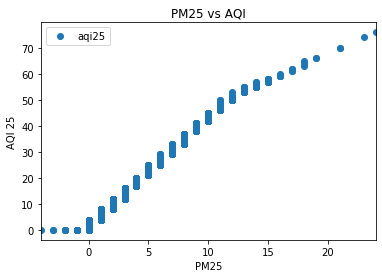

In [0]:
alt_mean_table.plot(x='pm25', y='aqi25', style='o')  
plt.title('PM25 vs AQI')  
plt.xlabel('PM25')  
plt.ylabel('AQI 25')  
plt.show()

In [0]:
X = alt_mean_table['pm25'].values.reshape(-1,1)
y = alt_mean_table['aqi25'].values.reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.94485576]
[[4.09287222]]


In [0]:
y_pred = regressor.predict(X_test)

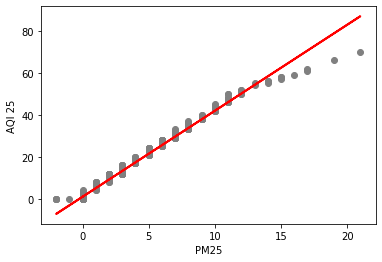

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('PM25')  
plt.ylabel('AQI 25')  
plt.show()

In [0]:
alt_mean_table['pm10'] = alt_mean_table['pm10'].astype(float)
alt_mean_table['aqi10'] = alt_mean_table['aqi10'].astype(float)

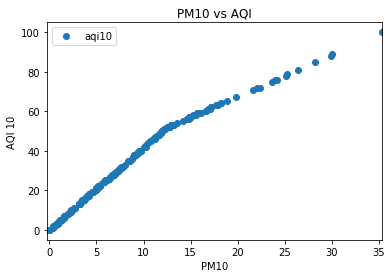

In [0]:
alt_mean_table.plot(x='pm10', y='aqi10', style='o')  
plt.title('PM10 vs AQI')  
plt.xlabel('PM10')  
plt.ylabel('AQI 10')  
plt.show()

In [0]:
X = alt_mean_table['pm10'].values.reshape(-1,1)
y = alt_mean_table['aqi10'].values.reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.2064922]
[[3.58956563]]


In [0]:
y_pred = regressor.predict(X_test)

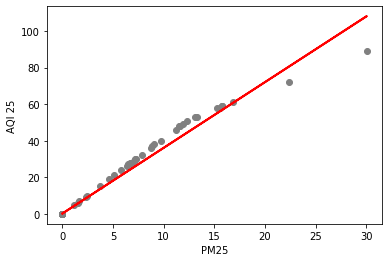

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('PM10')  
plt.ylabel('AQI')  
plt.show()

Individual contributions:
1. Vignesh
2. Ranjani
3. Pooja
4. Akshaya

Data collection - Vignesh and Ranjani
Data preprocessing - Akshaya and Pooja

